# IMPORTING LIBRARIES


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTING DATASET

In [ ]:
dataset=pd.read_csv("/content/data.csv")
dataset.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None


In [ ]:
dataset["horsepower"] =dataset["horsepower"].astype('int64')

In [ ]:
dataset.drop("name",axis=1,inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    int64  
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 25.0 KB


In [ ]:
print(dataset)

     origin  cylinders  displacement  horsepower  weight  acceleration  year  \
0         1          8         307.0         130    3504          12.0  1970   
1         1          8         350.0         165    3693          11.5  1970   
2         1          8         318.0         150    3436          11.0  1970   
3         1          8         304.0         150    3433          12.0  1970   
4         1          8         302.0         140    3449          10.5  1970   
..      ...        ...           ...         ...     ...           ...   ...   
393       1          4         140.0          86    2790          15.6  1982   
394       2          4          97.0          52    2130          24.6  1982   
395       1          4         135.0          84    2295          11.6  1982   
396       1          4         120.0          79    2625          18.6  1982   
397       1          4         119.0          82    2720          19.4  1982   

     Kilometer_per_liter  
0           

<AxesSubplot:>

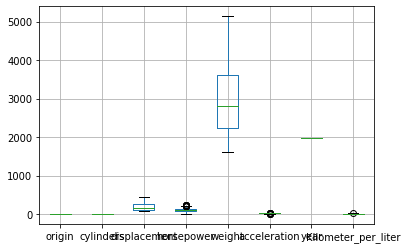

In [ ]:
dataset.boxplot()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='horsepower'>

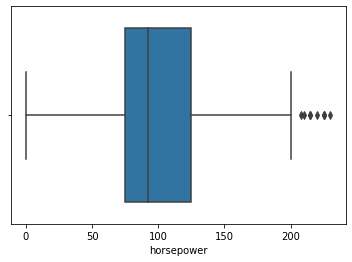

In [ ]:
sns.boxplot(dataset["horsepower"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='acceleration'>

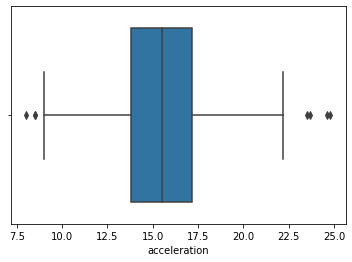

In [ ]:
sns.boxplot(dataset["acceleration"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kilometer_per_liter'>

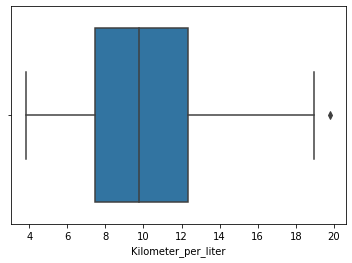

In [ ]:
sns.boxplot(dataset["Kilometer_per_liter"])

# TAKING CARE OF OUTLIERS

In [ ]:
def outliers(data,columns):
  for column in columns:
    q1=data[column].quantile(0.25)
    q3=data[column].quantile(0.75)
    iqr=q3-q1
    lower_lmt=q1-1.5*iqr
    upper_lmt=q3+1.5*iqr
    data=data[((data[column]>lower_lmt) & (data[column]<upper_lmt))]
    return data

In [ ]:
columns=["horsepower","acceleration"]
outliers(dataset,columns)

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,7.652587
1,1,8,350.0,165,3693,11.5,1970,6.377156
2,1,8,318.0,150,3436,11.0,1970,7.652587
3,1,8,304.0,150,3433,12.0,1970,6.802299
4,1,8,302.0,140,3449,10.5,1970,7.227443
...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,11.478880
394,2,4,97.0,52,2130,24.6,1982,18.706323
395,1,4,135.0,84,2295,11.6,1982,13.604599
396,1,4,120.0,79,2625,18.6,1982,11.904024


In [ ]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

# SPLITTING THE DATASET

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# APPLING LINEAR REGGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)
print(y_pred)

[ 5.49959755 10.14879053  4.98693783  8.91634768  7.30595978 12.65926998
 14.01193477 10.11303836  5.95209557 11.33438236 14.54708749 14.33386286
  9.00906935 11.3539516   6.90856265 12.93889852 12.27084879 12.31172664
  7.36549013 12.93261651  6.73638295 10.47606863 11.43694225  8.4488219
 12.39974657 11.98174404 12.99286151 12.9867586  12.34923791  7.7205168
  8.84990949 13.16800534  8.99158135 13.60243277 10.146974   10.7346459
  9.0048387   7.27016669 13.428595    3.77217208  4.40443529  5.91267639
 11.00515182 12.63647096 13.21522403  9.51256205  9.75444049  5.87325721
  9.50695896 11.8025021  13.24852581 11.27262594  6.50527343 10.48158252
  6.37939589  3.85653152  8.21443031 11.12948253 12.7247446   6.20193983
  8.88412256 10.37288515  9.33845586  8.04144656  4.60724718  5.00613042
  4.41459364  8.28038568 10.16529107  4.37528412 14.75372943  4.46019545
  8.86765557  8.04162146 10.07468425 11.78905582 12.90747041 12.71575946
 12.13489212  6.86179101  5.27887452 11.74966901 13.22

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.8194456073318008
